# Nicaviz Demo

_By Nicapotato_

In [1]:
%reload_ext autoreload
%autoreload 2
%load_ext watermark

In [2]:
import pandas as pd
import numpy as np
from numpy import random
import nicaviz
import seaborn as sns

sns.set_style("whitegrid")

%watermark 
%watermark --iversions

Last updated: 2021-09-23T09:50:56.849946+01:00

Python implementation: CPython
Python version       : 3.7.7
IPython version      : 7.13.0

Compiler    : Clang 4.0.1 (tags/RELEASE_401/final)
OS          : Darwin
Release     : 19.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 12
Architecture: 64bit

pandas : 1.2.3
seaborn: 0.10.1
numpy  : 1.18.1
nicaviz: 0.0.5



In [3]:
def random_dates(start, end, n=10):

    start_u = start.value//10**9
    end_u = end.value//10**9

    return pd.to_datetime(np.random.randint(start_u, end_u, n), unit='s')

DFLEN = 5000
df = pd.DataFrame({
    'int_small': random.randint(low=0, high=5, size=DFLEN),
    'int_med': random.randint(low=0, high=20, size=DFLEN),
    'str_med': random.choice(["a","b","c","d","e","f","g"], size=DFLEN),
    'str_med_two': random.choice([x for x in "qwerty"], size=DFLEN),
    'str_small': random.choice(["blue","red"], size=DFLEN),
    'bool': random.choice([True,False], size=DFLEN),
    'cont_rand': random.random(size=DFLEN)*10,
    'cont_uni': random.normal(loc=0, scale=1, size=DFLEN)*10,
    'date': pd.date_range(start='1/1/2018', periods=DFLEN),
    'timestamp': random_dates(pd.to_datetime('2018-01-01'), pd.to_datetime('2018-03-01'), n=DFLEN)
    })

display(df.sample(10))

,int_small,int_med,str_med,str_med_two,str_small,bool,cont_rand,cont_uni,date,timestamp
4713,3,10,b,w,red,False,0.300625,2.478635,2030-11-27,2018-02-24 10:09:40
1454,2,13,d,r,red,False,2.787206,6.456571,2021-12-25,2018-01-19 20:07:14
3863,3,14,a,r,red,True,9.296327,-6.054552,2028-07-30,2018-02-14 06:40:15
1803,0,4,g,w,red,False,0.211717,6.083189,2022-12-09,2018-02-21 14:58:40
4163,0,17,d,y,blue,False,3.151504,0.283065,2029-05-26,2018-01-27 14:04:36
1983,2,6,c,e,blue,False,3.153082,-2.085651,2023-06-07,2018-01-15 00:51:29
3738,3,18,f,r,red,True,8.348521,2.507852,2028-03-27,2018-02-03 21:53:40
4636,1,10,d,t,red,False,0.497825,7.214270,2030-09-11,2018-02-03 01:13:51
4321,0,4,b,e,red,False,2.204726,10.658200,2029-10-31,2018-02-18 20:19:54
2329,0,12,a,w,red,True,4.683768,-9.449141,2024-05-18,2018-02-05 14:25:18


In [4]:
df.head()

,int_small,int_med,str_med,str_med_two,str_small,bool,cont_rand,cont_uni,date,timestamp
0,4,0,e,w,blue,True,4.358801,14.623203,2018-01-01,2018-02-09 11:56:12
1,3,16,d,y,blue,True,1.177332,-6.802152,2018-01-02,2018-02-24 03:28:03
2,2,3,d,r,blue,False,0.780045,18.991657,2018-01-03,2018-02-23 07:18:42
3,2,12,c,q,red,False,2.088132,-6.991673,2018-01-04,2018-01-16 17:38:39
4,1,4,d,y,red,False,3.273029,0.002004,2018-01-05,2018-02-19 05:00:53


In [5]:
df.nica.categorical_describe()

Dataframe Dimension: 5000 Rows, 10 Columns


,Unique,Missing,dtype,ValCount 1,Occ,ValCount 2,Occ,ValCount 3,Occ,ValCount 4,Occ,ValCount 5,Occ
Column,,,,,,,,,,,,,
int_small,5,0,int64,1,1017,0,1016,3,1006.0,2,990.0,4,971.0
int_med,20,0,int64,2,278,15,277,9,272.0,13,266.0,3,265.0
str_med,7,0,object,f,752,d,727,g,713.0,c,710.0,b,706.0
str_med_two,6,0,object,y,869,t,850,r,841.0,e,828.0,w,827.0
str_small,2,0,object,red,2572,blue,2428,NaN,NaN,NaN,NaN,NaN,NaN
bool,2,0,bool,True,2520,False,2480,NaN,NaN,NaN,NaN,NaN,NaN
cont_rand,5000,0,float64,6.8638,1,0.313312,1,4.601224,1.0,1.342821,1.0,9.310325,1.0
cont_uni,5000,0,float64,-10.524753,1,-21.065273,1,-10.199372,1.0,17.257484,1.0,-3.201625,1.0
date,5000,0,datetime64[ns],2026-04-30 00:00:00,1,2020-10-31 00:00:00,1,2021-09-28 00:00:00,1.0,2030-04-04 00:00:00,1.0,2025-12-02 00:00:00,1.0


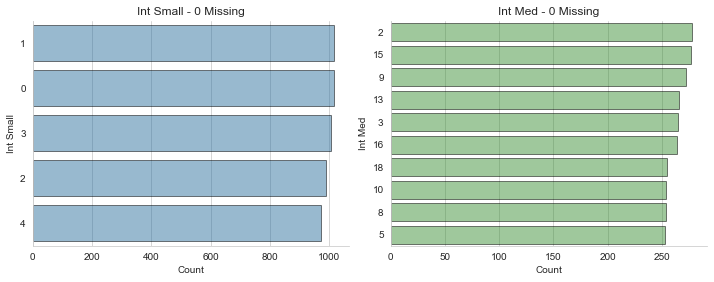

In [6]:
df.nica.mass_plot(
    plt_set= ["int_small", "int_med"],
    plottype = "countplot")

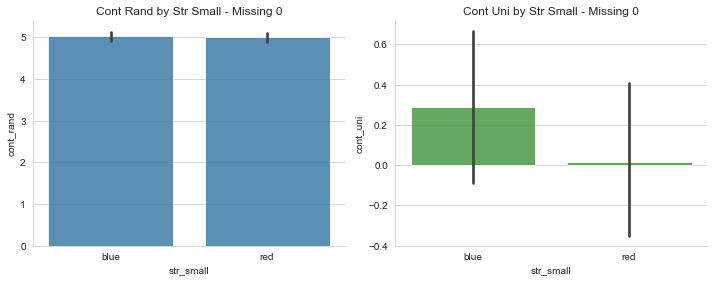

In [7]:
df.nica.mass_plot(
    plt_set= ["cont_rand", "cont_uni"],
    x_var = "str_small",
    plottype = "bar")

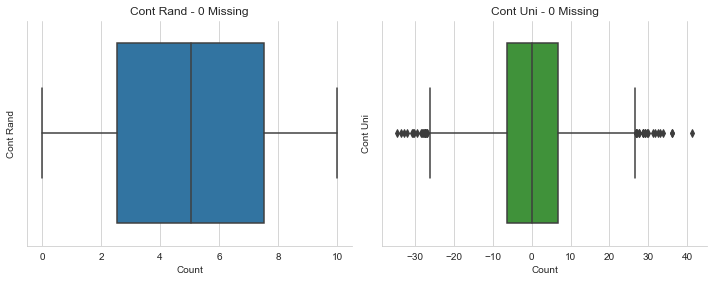

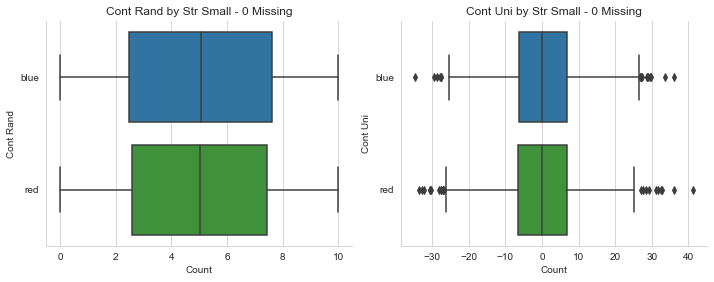

In [8]:
df.nica.mass_plot(
    plt_set= ["cont_rand", "cont_uni"],
    plottype = "boxplot")

df.nica.mass_plot(
    plt_set= ["cont_rand", "cont_uni"],
    hue = "str_small",
    plottype = "boxplot")

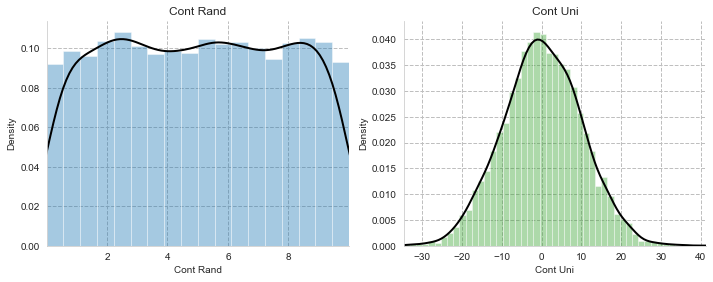

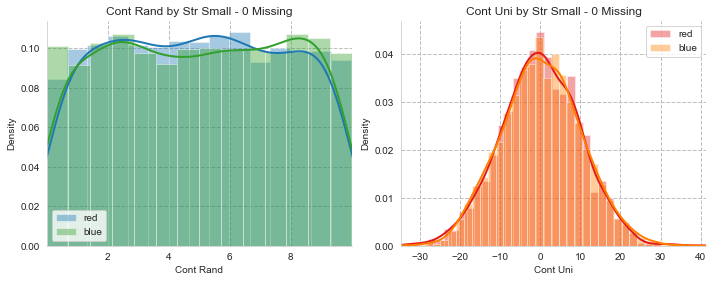

In [9]:
df.nica.mass_plot(
    plt_set= ["cont_rand", "cont_uni"],
    plottype = "distplot")

df.nica.mass_plot(
    plt_set= ["cont_rand", "cont_uni"],
    hue = "str_small",
    plottype = "distplot")

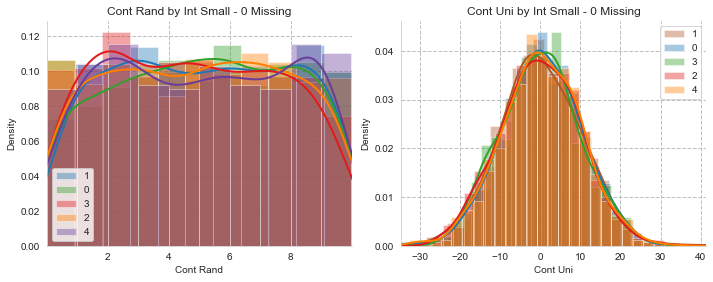

In [10]:
df.nica.mass_plot(
    plt_set= ["cont_rand", "cont_uni"],
    hue = "int_small",
    plottype = "distplot")

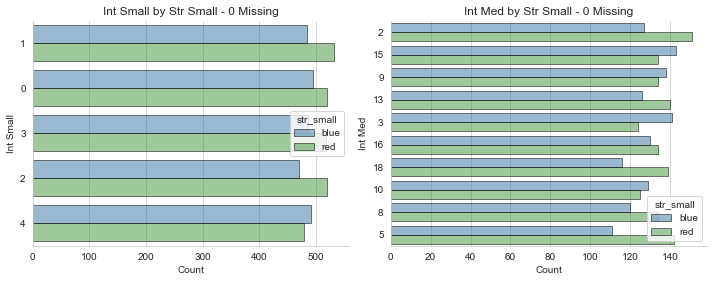

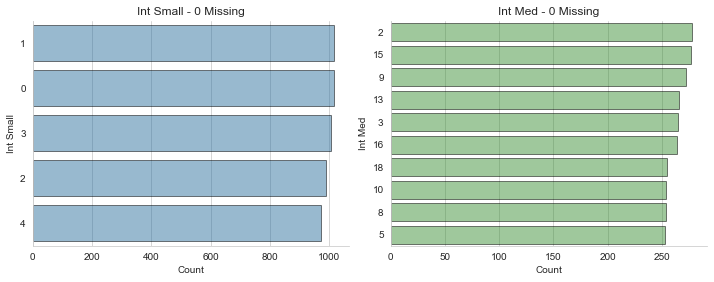

In [11]:
df.nica.mass_plot(
    plt_set= ["int_small", "int_med"],
    hue = "str_small",
    plottype = "countplot")

df.nica.mass_plot(
    plt_set= ["int_small", "int_med"],
    plottype = "countplot")

### Time Series

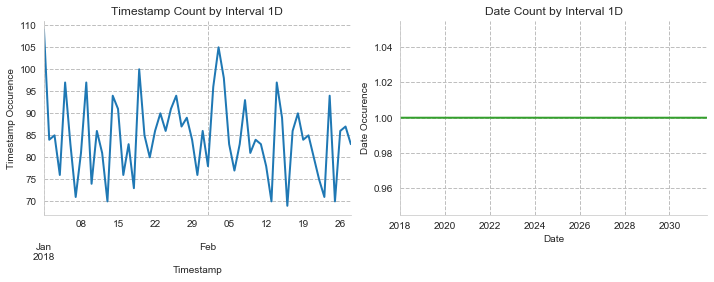

In [12]:
df.nica.mass_plot(
    plt_set= ["timestamp", "date"],
    plottype = "ts_resample",
    resample=True,
    resample_interval="1D"
)

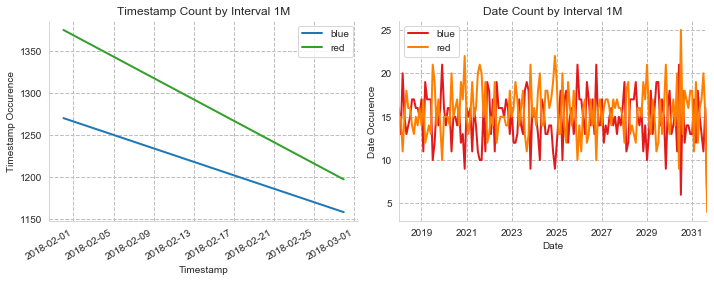

In [13]:
df.nica.mass_plot(
    plt_set= ["timestamp", "date"],
    plottype = "ts_resample",
    resample=True,
    hue = "str_small",
    resample_interval="1M"
)

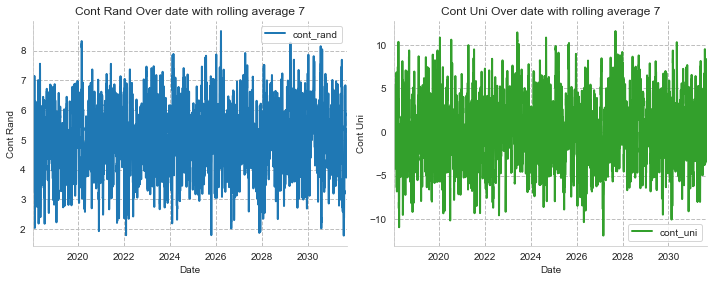

In [14]:
df.nica.mass_plot(
    plt_set= ["cont_rand", "cont_uni"],
    plottype = "ts_rolling",
    x_var="date",
    rolling=True,
    r=7
)

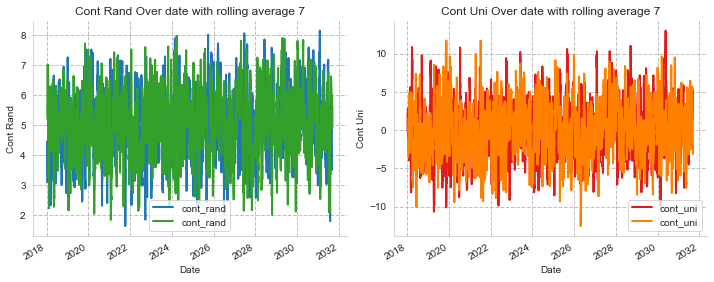

In [15]:
df.nica.mass_plot(
    plt_set= ["cont_rand", "cont_uni"],
    plottype = "ts_rolling",
    hue = "str_small",
    x_var="date",
    rolling=True,
    r=7
)

### WordClouds

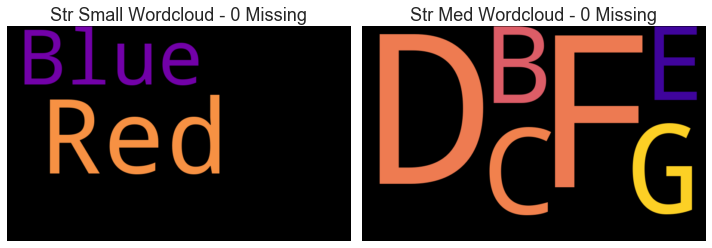

In [16]:
df.nica.mass_plot(
    plt_set= ["str_small", "str_med"],
    plottype = "wordcloud")

### Rank Correlations

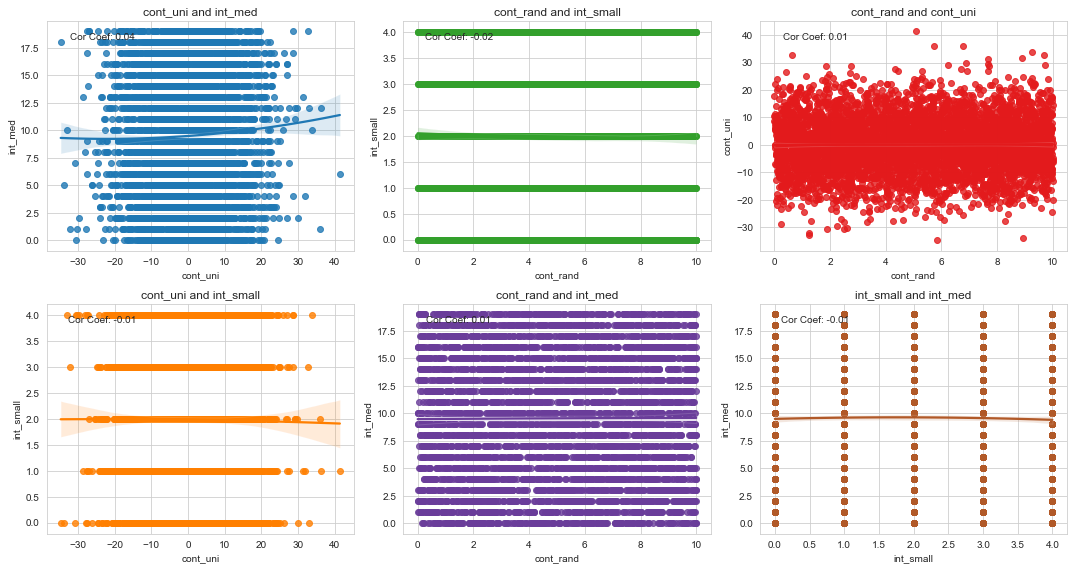

In [17]:
df.nica.rank_correlations_plots(["cont_rand", "cont_uni", "int_small", "int_med"], 9)

### Pivot Heatmaps

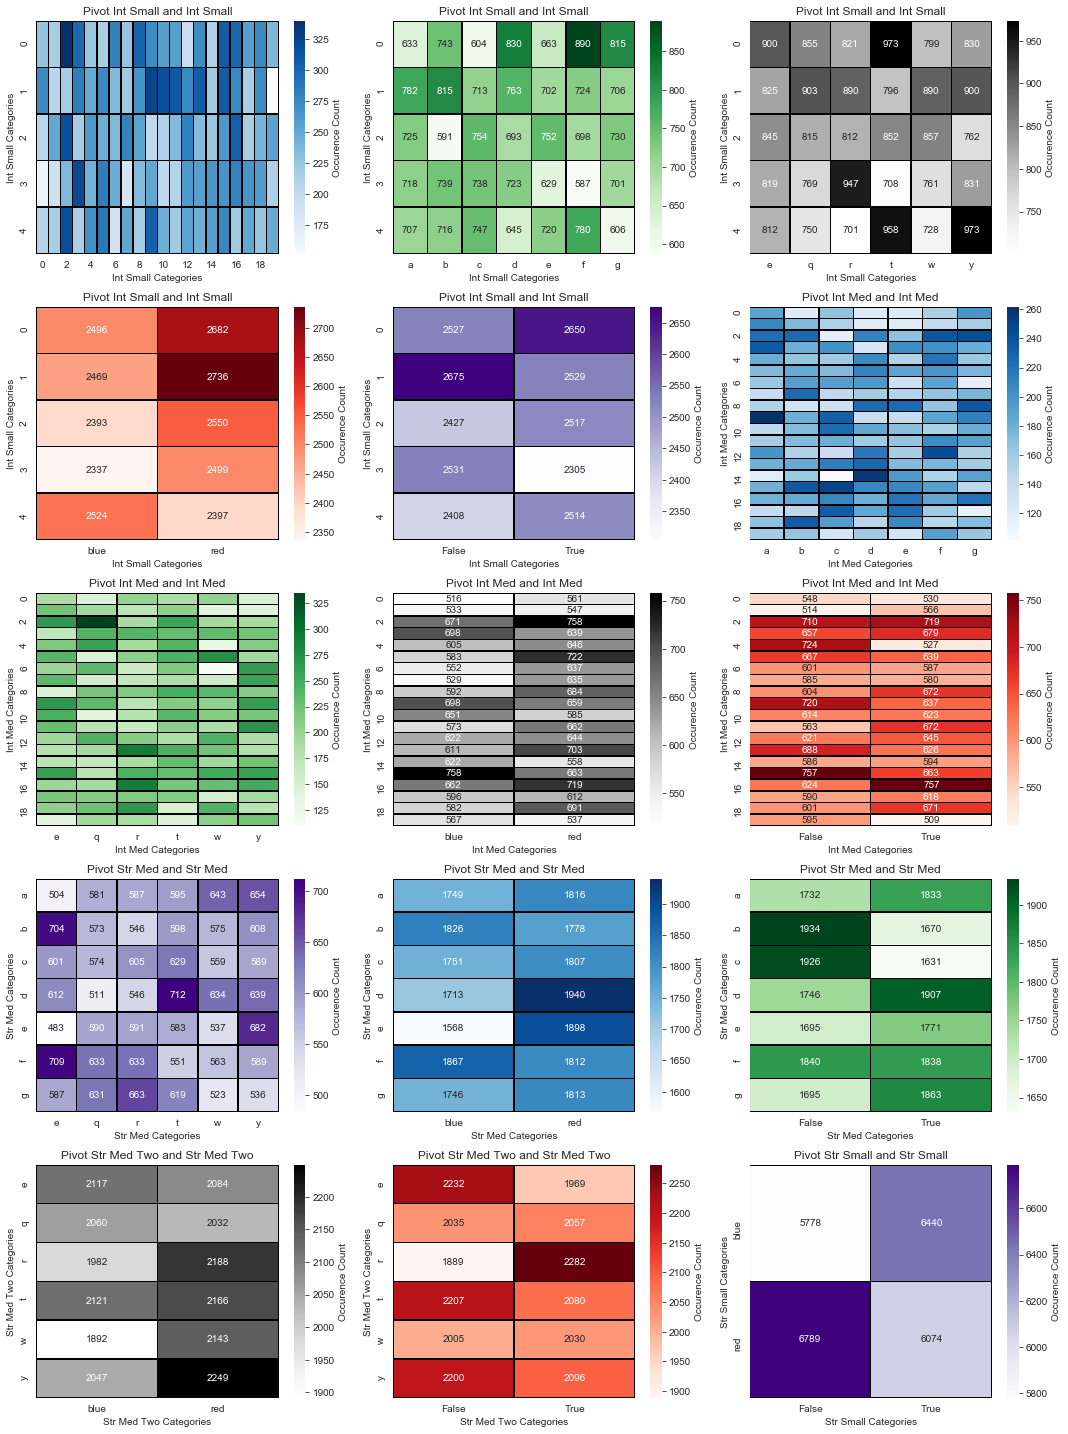

In [18]:
categorical = ['int_small', 'int_med', 'str_med', 'str_med_two', 'str_small', 'bool']
df.nica.pivot_plots(categorical, "cont_rand", np.sum)

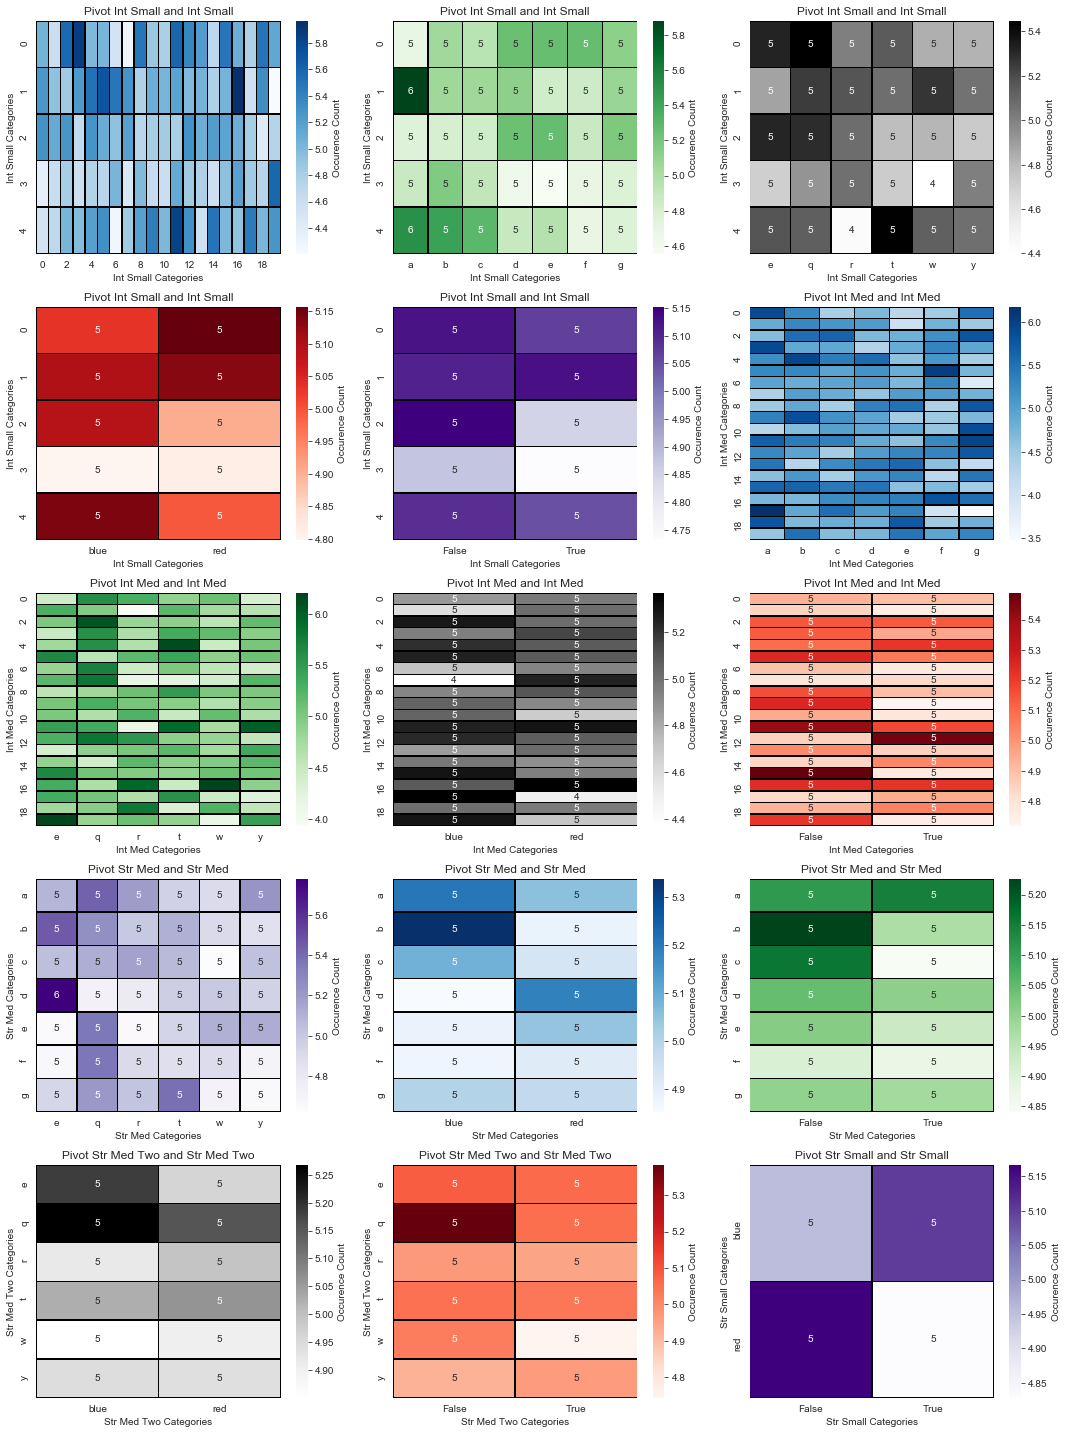

In [19]:
df.nica.pivot_plots(categorical, "cont_rand", np.mean)